In [1]:
import data_preprocess_functions as dp_f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from sklearn.utils import shuffle

from tensorflow.keras.utils import to_categorical

from tensorflow.keras import Model
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import math

In [2]:
mode='VariableCone_m/'
path='../PKL/Zprime'+mode
dumper_path=path

In [3]:
data_singleBJet=pd.read_csv(path+'singleBJet_df_m3.csv')
data_singleBTrk=pd.read_csv(path+'singleBTrk_df_m3.csv')
data_lightJet=pd.read_csv(path+'lightJet_df_m3.csv')
data_lightTrk=pd.read_csv(path+'lightTrk_df_m3.csv')

data_singleBJet_02=pd.read_csv(path+'singleBJet_0.2_df.csv')
data_singleBTrk_02=pd.read_csv(path+'singleBTrk_0.2_df.csv')

In [4]:
data_singleBTrk_02.query('isfromtau==0 and isfromBoutDR==0').shape[0],data_singleBTrk.shape[0]

(62492, 66058)

In [5]:
cut='isfromBoutDR==0 and isfromtau==0'
#scut='isfromBoutDR==1 or isfromtau==1'
den=False
alp=0.8
#directory='./plot_confronto2/'

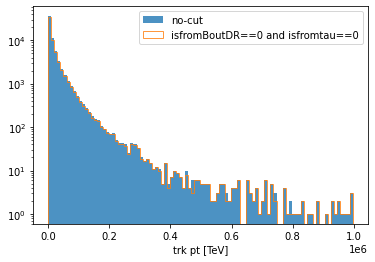

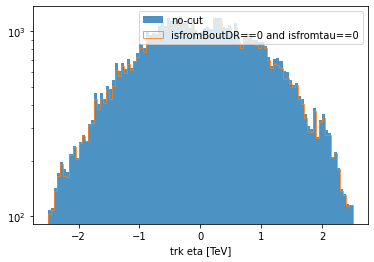

In [6]:
#title_1='oneB_Jets'
#title_2='light_Jets'
#plt.title(title_1)
plt.hist(data_singleBTrk.query('pT<1e6')['pT'],bins=100,histtype='bar',label='no-cut',density=den,alpha=alp)
plt.hist(data_singleBTrk_02.query('pT<1e6').query(cut)['pT'],bins=100,histtype='step',label=cut,density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('trk pt [TeV]')
plt.legend()
#plt.savefig(directory+title_1+'_pT.pdf')
plt.show()

#title_1='oneB_Jets'
#title_2='light_Jets'
#plt.title(title_1)
plt.hist(data_singleBTrk['Eta'],bins=100,histtype='bar',label='no-cut',density=den,alpha=alp)
plt.hist(data_singleBTrk_02.query(cut)['Eta'],bins=100,histtype='step',label=cut,density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('trk eta [TeV]')
plt.legend()
#plt.savefig(directory+title_1+'_pT.pdf')
plt.show()

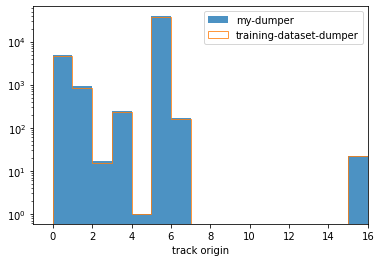

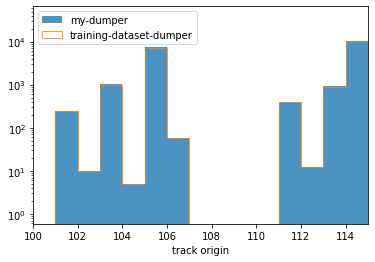

<ipython-input-7-c52f58755e1f>:27: RuntimeWarning: invalid value encountered in true_divide
  plt.step(b1[:len(a1)],a1/a2)


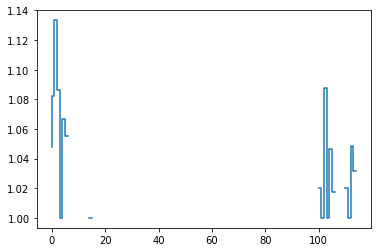

In [7]:
bin_range=range(0,int(max(data_singleBTrk['excl_origin'])))
#title_1='oneB_Jets_tracks'
#title_2='light_Jets_tracks'
#plt.title(title_1)
a1,b1,_=plt.hist(data_singleBTrk['excl_origin'],bins=bin_range,histtype='bar',label='my-dumper',density=den,alpha=alp)
a2,b2,_=plt.hist(data_singleBTrk_02.query(cut)['excl_origin'],bins=bin_range,histtype='step',label='training-dataset-dumper',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track origin')
plt.xlim([-1,16])
plt.legend()
#plt.savefig(directory+title_1+'_trk_origin_1.pdf')
plt.show()

bin_range=range(0,int(max(data_singleBTrk['excl_origin'])))
#title_1='oneB_Jets_tracks'
#title_2='light_Jets_tracks'
#plt.title(title_1)
plt.hist(data_singleBTrk['excl_origin'],bins=bin_range,histtype='bar',label='my-dumper',density=den,alpha=alp)
plt.hist(data_singleBTrk_02.query(cut)['excl_origin'],bins=bin_range,histtype='step',label='training-dataset-dumper',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track origin')
plt.xlim([100,115])
plt.legend()
#plt.savefig(directory+title_1+'_trk_origin_2.pdf')
plt.show()

plt.step(b1[:len(a1)],a1/a2)
plt.show()


<ipython-input-94-613d7acc1e8a>:20: RuntimeWarning: invalid value encountered in true_divide
  st.step(b1[:len(a1)],a1/a2)
<ipython-input-94-613d7acc1e8a>:43: RuntimeWarning: invalid value encountered in true_divide
  st.step(b1[:len(a1)],a1/a2)
<ipython-input-94-613d7acc1e8a>:67: RuntimeWarning: divide by zero encountered in true_divide
  st.step(b1[:len(a1)],a1/a2)
<ipython-input-94-613d7acc1e8a>:67: RuntimeWarning: invalid value encountered in true_divide
  st.step(b1[:len(a1)],a1/a2)


Text(0.5, 0, 'track z0')

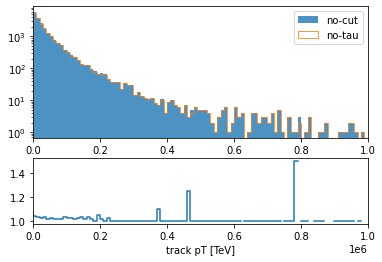

<Figure size 576x576 with 0 Axes>

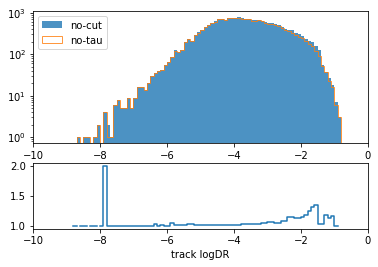

<Figure size 576x576 with 0 Axes>

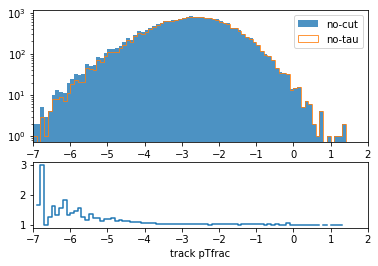

<Figure size 576x576 with 0 Axes>

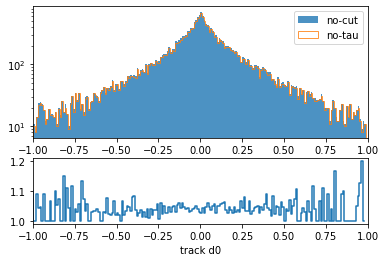

<Figure size 576x576 with 0 Axes>

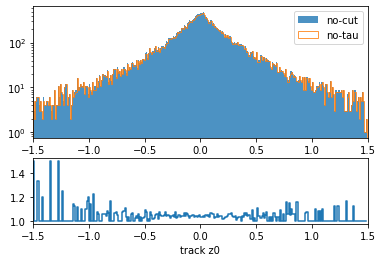

<Figure size 576x576 with 0 Axes>

In [94]:
x0,x1=0,int(1e6)
bin_range=np.arange(x0,x1,1e4)

fig = plt.figure()
plt.figure(figsize=(8,8))
#plt.suptitle('AntiKt4EMPFlowJets')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

h1=fig.add_subplot(gs[0])
a1,b1,_=h1.hist(data_singleBTrk.query('isfromBD==1 and pT<1e6')['pT'],bins=bin_range,histtype='bar',label='no-cut',density=den,alpha=alp)
a2,b2,_=h1.hist(data_singleBTrk_02.query(cut).query('isfromBD==1 and pT<1e6')['pT'],bins=bin_range,histtype='step',label='no-tau',density=den,alpha=alp)
h1.set_xlim(x0,x1)
h1.set_yscale('log')
h1.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
#plt.show()

st=fig.add_subplot(gs[1])
#plt.figure(figsize=(8,2))
st.step(b1[:len(a1)],a1/a2)
st.set_xlabel('track pT [TeV]')
st.set_xlim(x0,x1)
#plt.show()

x0,x1=-10,0
bin_range=np.arange(x0,x1,1e-1)
fig = plt.figure()
plt.figure(figsize=(8,8))
#plt.suptitle('AntiKt4EMPFlowJets')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

h1=fig.add_subplot(gs[0])
a1,b1,_=h1.hist(data_singleBTrk.query('isfromBD==1 and pT<1e6')['DR'].apply(lambda x: math.log(x)),bins=bin_range,histtype='bar',label='no-cut',density=den,alpha=alp)
a2,b2,_=h1.hist(data_singleBTrk_02.query(cut).query('isfromBD==1 and pT<1e6')['DR'].apply(lambda x: math.log(x)),bins=bin_range,histtype='step',label='no-tau',density=den,alpha=alp)
h1.set_xlim(x0,x1)
h1.set_yscale('log')
h1.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
#plt.show()

st=fig.add_subplot(gs[1])
#plt.figure(figsize=(8,2))
st.step(b1[:len(a1)],a1/a2)
st.set_xlim(x0,x1)
st.set_xlabel('track logDR')
#plt.show()


x0,x1=-7,2
bin_range=np.arange(x0,x1,1e-1)
fig = plt.figure()
plt.figure(figsize=(8,8))
#plt.suptitle('AntiKt4EMPFlowJets')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

h1=fig.add_subplot(gs[0])
a1,b1,_=h1.hist(data_singleBTrk.query('isfromBD==1 and pT<1e6')['pTfrac'].apply(lambda x: math.log(x)),bins=bin_range,histtype='bar',label='no-cut',density=den,alpha=alp)
a2,b2,_=h1.hist(data_singleBTrk_02.query(cut).query('isfromBD==1 and pT<1e6')['pTfrac'].apply(lambda x: math.log(x)),bins=bin_range,histtype='step',label='no-tau',density=den,alpha=alp)
h1.set_xlim(x0,x1)
h1.set_yscale('log')
h1.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
#plt.show()

st=fig.add_subplot(gs[1])
#plt.figure(figsize=(8,2))
st.step(b1[:len(a1)],a1/a2)
st.set_xlim(x0,x1)
st.set_xlabel('track pTfrac')
#plt.show()

x0,x1=-1,1
bin_range=np.arange(x0,x1,1e-2)
fig = plt.figure()
plt.figure(figsize=(8,8))
#plt.suptitle('AntiKt4EMPFlowJets')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

h1=fig.add_subplot(gs[0])
a1,b1,_=h1.hist(data_singleBTrk.query('isfromBD==1 and pT<1e6')['trk_d0'],bins=bin_range,histtype='bar',label='no-cut',density=den,alpha=alp)
a2,b2,_=h1.hist(data_singleBTrk_02.query(cut).query('isfromBD==1 and pT<1e6')['trk_d0'],bins=bin_range,histtype='step',label='no-tau',density=den,alpha=alp)
h1.set_xlim(x0,x1)
h1.set_yscale('log')
h1.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
#plt.show()

st=fig.add_subplot(gs[1])
#plt.figure(figsize=(8,2))
st.step(b1[:len(a1)],a1/a2)
st.set_xlim(x0,x1)
st.set_xlabel('track d0')
#plt.show()

x0,x1=-1.5,1.5
bin_range=np.arange(x0,x1,1e-2)
fig = plt.figure()
plt.figure(figsize=(8,8))
#plt.suptitle('AntiKt4EMPFlowJets')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

h1=fig.add_subplot(gs[0])
a1,b1,_=h1.hist(data_singleBTrk.query('isfromBD==1 and pT<1e6')['trk_z0SinTheta'],bins=bin_range,histtype='bar',label='no-cut',density=den,alpha=alp)
a2,b2,_=h1.hist(data_singleBTrk_02.query(cut).query('isfromBD==1 and pT<1e6')['trk_z0SinTheta'],bins=bin_range,histtype='step',label='no-tau',density=den,alpha=alp)
h1.set_xlim(x0,x1)
h1.set_yscale('log')
h1.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
#plt.show()

st=fig.add_subplot(gs[1])
#plt.figure(figsize=(8,2))
st.step(b1[:len(a1)],a1/a2)
st.set_xlim(x0,x1)
st.set_xlabel('track z0')
#plt.show()


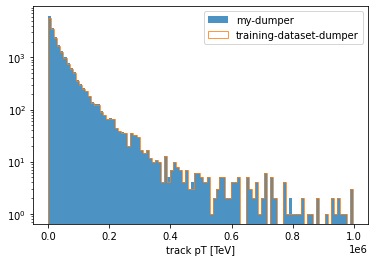

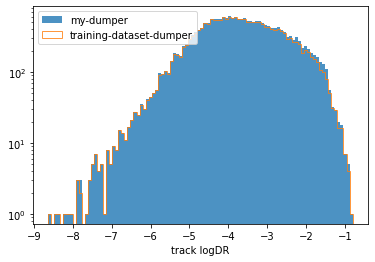

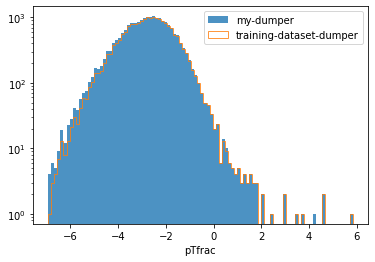

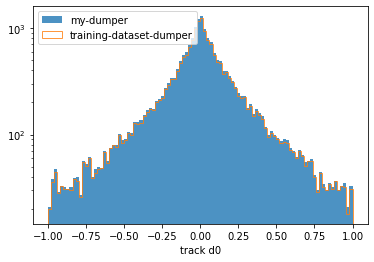

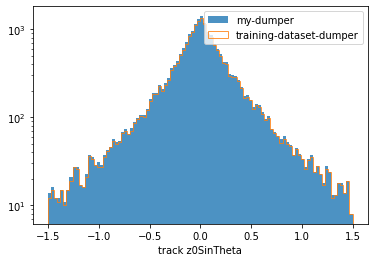

In [74]:
#bin_range=range(0,int(1e2))
plt.hist(data_singleBTrk.query('isfromBD==1 and pT<1e6')['pT'],bins=100,histtype='bar',label='my-dumper',density=den,alpha=alp)
plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==1 and pT<1e6')['pT'],bins=100,histtype='step',label='training-dataset-dumper',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track pT [TeV]')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

plt.hist(data_singleBTrk.query('isfromBD==1')['DR'].apply(lambda x: math.log(x)),bins=100,histtype='bar',label='my-dumper',density=den,alpha=alp)
plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['DR'].apply(lambda x: math.log(x)),bins=100,histtype='step',label='training-dataset-dumper',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track logDR')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

plt.hist(data_singleBTrk.query('isfromBD==1')['pTfrac'].apply(lambda x: math.log(x)),bins=100,histtype='bar',label='my-dumper',density=den,alpha=alp)
plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['pTfrac'].apply(lambda x: math.log(x)),bins=100,histtype='step',label='training-dataset-dumper',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('pTfrac')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

plt.hist(data_singleBTrk.query('isfromBD==1')['trk_d0'],bins=100,histtype='bar',label='my-dumper',density=den,alpha=alp)
plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['trk_d0'],bins=100,histtype='step',label='training-dataset-dumper',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track d0')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

plt.hist(data_singleBTrk.query('isfromBD==1')['trk_z0SinTheta'],bins=100,histtype='bar',label='my-dumper',density=den,alpha=alp)
plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==1')['trk_z0SinTheta'],bins=100,histtype='step',label='training-dataset-dumper',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track z0SinTheta')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

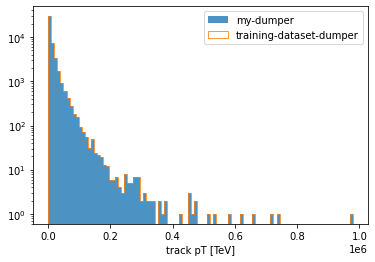

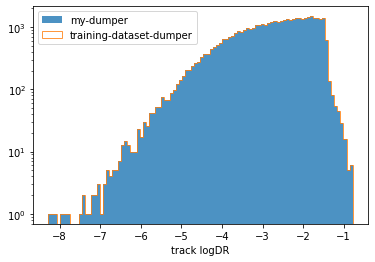

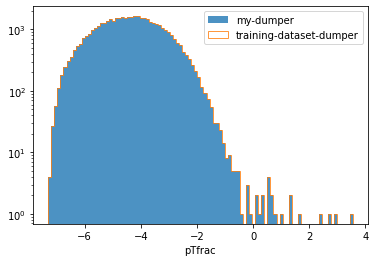

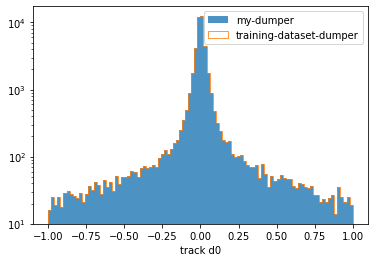

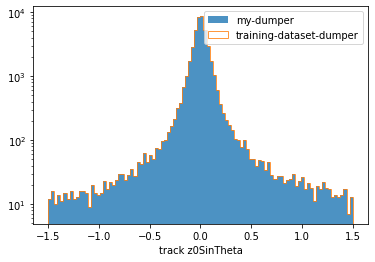

In [62]:
plt.hist(data_singleBTrk.query('isfromBD==0 and pT<1e6')['pT'],bins=100,histtype='bar',label='my-dumper',density=den,alpha=alp)
plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==0 and pT<1e6')['pT'],bins=100,histtype='step',label='training-dataset-dumper',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track pT [TeV]')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

plt.hist(data_singleBTrk.query('isfromBD==0')['DR'].apply(lambda x: math.log(x)),bins=100,histtype='bar',label='my-dumper',density=den,alpha=alp)
plt.hist(data_singleBTrk_02.query(cut).query('isfromBD==0')['DR'].apply(lambda x: math.log(x)),bins=100,histtype='step',label='training-dataset-dumper',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track logDR')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

plt.hist(data_singleBTrk.query('isfromBD==0')['pTfrac'].apply(lambda x: math.log(x)),bins=100,histtype='bar',label='my-dumper',density=den,alpha=alp)
plt.hist(data_singleBTrk.query(cut).query('isfromBD==0')['pTfrac'].apply(lambda x: math.log(x)),bins=100,histtype='step',label='training-dataset-dumper',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('pTfrac')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

plt.hist(data_singleBTrk.query('isfromBD==0')['trk_d0'],bins=100,histtype='bar',label='my-dumper',density=den,alpha=alp)
plt.hist(data_singleBTrk.query(cut).query('isfromBD==0')['trk_d0'],bins=100,histtype='step',label='training-dataset-dumper',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track d0')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()

plt.hist(data_singleBTrk.query('isfromBD==0')['trk_z0SinTheta'],bins=100,histtype='bar',label='my-dumper',density=den,alpha=alp)
plt.hist(data_singleBTrk.query(cut).query('isfromBD==0')['trk_z0SinTheta'],bins=100,histtype='step',label='training-dataset-dumper',density=den,alpha=alp)
plt.yscale('log')
plt.xlabel('track z0SinTheta')
plt.legend()
#plt.savefig(directory+title_1+'_trk_pT_3.pdf')
plt.show()